**Deep learning-based cryptocurrency
sentiment construction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../input/df.csv") 

In [3]:
df.head()

tweets         class
0  RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...           NaN
1  @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...           NaN
2  RT @tippereconomy: Another use case for #block...  ['positive']
3                 free coins https://t.co/DiuoePJdap  ['positive']
4  RT @payvxofficial: WE are happy to announce th...  ['positive']

In [4]:
df.isnull().sum()

tweets        0
class     21939
dtype: int64

In [ ]:
df.groupby('class').describe()

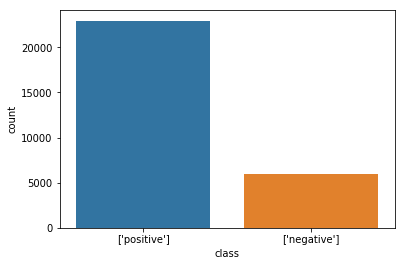

In [5]:
# inspect sentiment
sns.countplot(df['class'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
tweets    50859 non-null object
class     28920 non-null object
dtypes: object(2)
memory usage: 794.8+ KB


**Data Processing**

In [7]:
import nltk
from nltk.corpus import stopwords
import re
import string
def preprocess(s,remove_stopwords=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case 
    s = s.lower()

    # Clean the text with the same procedure
    s = re.sub(r"http\S+", "linktag", s) #linktag
    s = re.sub(r"@\S+", "usertag", s) #usertag
    s = re.sub(r"$\S+", "moneytag", s) #moneytag
    #s = re.sub("^\d+\s|\s\d+\s|\s\d+$", "numbertag", s) #numbertag
    s = re.sub(r" not ", " negtag_ ", s) #negtag_ added to "not", "no", "none","neither", "never" "nobody"
    s = re.sub(r" none ", " negtag_ ", s)
    s = re.sub(r" no ", " negtag_ ", s)
    s = re.sub(r" neither ", " negtag_ ", s)
    s = re.sub(r" never ", " negtag_ ", s)
    s = re.sub(r" nobody ", " negtag_ ", s)
    s = re.sub(r"(RT|via)((?:\\b\\W*@\\w+)+)", " ", s) # 
    s = re.sub(r"&amp", " ", s) #
    s = re.sub(r" RT ", " ", s) #
    
    # remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        s = [w for w in s if not w in stops]

    # remove punctuation except "!" and "?" from each word
    remove = string.punctuation
    remove = remove.replace("?", "") # don't remove Interrogation marks
    remove = remove.replace("!", "") # don't remove Exclamation marks
    pattern = r"[{}]".format(remove) # create the pattern
    re.sub(pattern, "", s) 
    
    # Return a list of words
    return(s)
df['clean_tweet'] = df['tweets'].apply(preprocess)

In [8]:
# On affiche les tweets contenant ? ou !
for i in range(df.shape[0]):
    if('?' in df.iloc[i,0] or '!' in df.iloc[i,0]):
        print(i,' ',df.iloc[i,0],'||',df.iloc[i,2])

2   RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy  can unseat Facebook and change everything! ICO Live No… || rt usertag another use case for #blockchain and #tipper. the #tippereconomy  can unseat facebook and change everything! ico live no…
4   RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!

Sign up --&gt;&gt; https://t.co/dhprzsSxek
Currencies accept… || rt usertag we are happy to announce that payvx presale phase 1 is now live!

sign up --&gt;&gt; linktag
currencies accept…
5   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/qb2NXPknVt… https://t.co/Q43fKQRYzx || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
6   RT @bethereumteam: We're revealing our surprise tomorrow! 
Are you ready to celebrate with us? 😮
#surprise #presents #crypto #bitcoin #ethe… || rt usertag we're revealing our surprise to

1032   RT @ebitToken: #Giveaway of the week! .2 BTC (Currently worth $2,080.71 USD) Please make sure you follow me &amp; RT this to enter. I’ll be doi… || rt usertag #giveaway of the week! .2 btc (currently worth $2,080.71 usd) please make sure you follow me  ; rt this to enter. i’ll be doi…
1039   Y'all need exact #bitcoin is that it? #SlidersRewatch #HappySlidersDay https://t.co/Mb1nyQvIqa || y'all need exact #bitcoin is that it? #slidersrewatch #happyslidersday linktag
1041   RT @CoinsAirdrops: #Bitcoin #crypto #blockchain #Airdrop

Earn Passive Income in #Ether from Ether Estate's Collectibles #Game! 📢

#EtherEs… || rt usertag #bitcoin #crypto #blockchain #airdrop

earn passive income in #ether from ether estate's collectibles #game! 📢

#etheres…
1045   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/foaaa5y2fm… https://t.co/rQWYSPFZLi || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ 

2217   Enough people agreed that something with no intrinsic value is a tradeable commodity, so now we have President Bitcoin. Is that it? || enough people agreed that something with negtag_ intrinsic value is a tradeable commodity, so now we have president bitcoin. is that it?
2218   RT @danielleradin: Show me the Bitcoin! #MillennialAQuote https://t.co/XiPUSjGmm2 || rt usertag show me the bitcoin! #millennialaquote linktag
2219   Child Abuse Content on Bitcoin Blockchain: Can Node Operators Be Prosecuted? https://t.co/DEidepZRFH https://t.co/FEVJqmN28j || child abuse content on bitcoin blockchain: can node operators be prosecuted? linktag linktag
2230   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birthday! 🎂
click on the article to find out what we're doing to #celebrate:
linktag
2232   RT @bethereumteam: We're revealing our surprise tomorrow! 
A

3131   RT @AirdropKitty: Technical Analysis suggests that #Bitcoin could rise to $50,000+ in 2018!

1 - 100x Leverage ✅

▶️ https://t.co/XokkANT2u… || rt usertag technical analysis suggests that #bitcoin could rise to $50,000+ in 2018!

1 - 100x leverage ✅

▶️ linktag
3133   RT @GymRewards: Upvoted: woww!! such a nice thing that i ever watched. Beautiful music video which created by GymRewards. via /r/GYMRewards… || rt usertag upvoted: woww!! such a nice thing that i ever watched. beautiful music video which created by gymrewards. via /r/gymrewards…
3140   RT @WealthE_Coin: New to the whole ICO thing?  Here is some info about what you need to know! #ICOs #Bitcoin #Blockchain #WealthMigrate #We… || rt usertag new to the whole ico thing?  here is some info about what you need to know! #icos #bitcoin #blockchain #wealthmigrate #we…
3141   RT @CryptoTVlive: Something BIG is coming  👀 Are you ready? We're launching a TV channel dedicated to all things #CRYPTO, including breakin… || rt usert

#cr…
4150   RT @bethereumteam: We're revealing our surprise tomorrow! 
Are you ready to celebrate with us? 😮
#surprise #presents #crypto #bitcoin #ethe… || rt usertag we're revealing our surprise tomorrow! 
are you ready to celebrate with us? 😮
#surprise #presents #crypto #bitcoin #ethe…
4154   https://t.co/l84Gxm5vf8|Based on blockchain genetic medicine ecological solution.
One of the hottest in 2018!!!
Use… https://t.co/HcmI7ARZUe || linktag on blockchain genetic medicine ecological solution.
one of the hottest in 2018!!!
use… linktag
4157   Join Action Coin to earn 100 free Action tokens!
https://t.co/uKSmlnNeFo#5a8fe61756e6a
Best airdrop ever! 
#bitcoin… https://t.co/tTx7GuHgSu || join action coin to earn 100 free action tokens!
linktag
best airdrop ever! 
#bitcoin… linktag
4158   RT @bethereumteam: Do you remember the last time you had fun while betting?
Well, with #Bethereum you will! We're bringing the holy trinity… || rt usertag do you remember the last time you had fun while b

5250   RT @GymRewards: #GYMBase to launch with 7 cryptocurrencies for #trading! https://t.co/ZOd85qqWK3   #ICO . GYM Rewards #cryptocurrency solut… || rt usertag #gymbase to launch with 7 cryptocurrencies for #trading! linktag   #ico . gym rewards #cryptocurrency solut…
5251   Binance Closing ??Twitter CEO on Bitcoin || PBOC Rumours &amp; EOS NEWS https://t.co/FploDZbbPJ || binance closing ??twitter ceo on bitcoin || pboc rumours  ; eos news linktag
5255   RT @Evareium_ITO: Last few hours to take advantage of 14.2% bonus on $EVM and 40% $EVT credit! Visit https://t.co/U3kpTyDCtG to invest. 

#… || rt usertag last few hours to take advantage of 14.2% bonus on $evm and 40% $evt credit! visit linktag to invest. 

#…
5258   RT @WorldCryptoNet: A Very Special Episode of Trading Bitcoin - LIVE!! From a Moscow Bar at 2am - What Can Go Wrong! https://t.co/LqZuiNPRV… || rt usertag a very special episode of trading bitcoin - live!! from a moscow bar at 2am - what can go wrong! linktag
5259   RT 

5955   RT @unilot_platform: Hi everybody! 👋 We want to remind you that only 2️⃣ days left to the end of the first stage of #ICO. On March 2️⃣2️⃣ w… || rt usertag hi everybody! 👋 we want to remind you that only 2️⃣ days left to the end of the first stage of #ico. on march 2️⃣2️⃣ w…
5956   Original Crypto Coin (OCC) is live on @coinlibio now! https://t.co/WJ6uFrpZzT 

#OCC #OriginalCryptoCoin #Crypto… https://t.co/PhuYho1wKz || original crypto coin (occ) is live on usertag now! linktag 

#occ #originalcryptocoin #crypto… linktag
5957   RT @bethereumteam: It's been 72 hours since the official launch of our Bounty campaign.
Is there a stronger crypto community out there?
#cr… || rt usertag it's been 72 hours since the official launch of our bounty campaign.
is there a stronger crypto community out there?
#cr…
5962   RT @bethereumteam: Less then 24 hours and our communities have grown by more than 20,000 members. All systems are still operational!
Are we… || rt usertag less then 24 hours an

6881   RT @bethereumteam: Are you a member of our Telegram community?
We're preparing something big for our family on #Telegram. ⚽🎾🏀
Join us: http… || rt usertag are you a member of our telegram community?
we're preparing something big for our family on #telegram. ⚽🎾🏀
join us: linktag
6885   [01:52 GMT]Arbitrage opportunity has occurred!!
The diff is 0.00000054 BTC!

1. Buy $BLK on poloniex(0.00002967 BTC… https://t.co/ndiSkwxs7U || [01:52 gmt]arbitrage opportunity has occurred!!
the diff is 0.00000054 btc!

1. buy $blk on poloniex(0.00002967 btc… linktag
6887   RT @jack: Really excited this is out! 

Direct deposit your paycheck right into the Cash App! 

Today with one download: store your money,… || rt usertag really excited this is out! 

direct deposit your paycheck right into the cash app! 

today with one download: store your money,…
6889   Install CryptoTab and mine Bitcoin! https://t.co/wnzmsLVu3u || install cryptotab and mine bitcoin! linktag
6895   @DemeterBilly Bitcoin Priv

GET BONUS here:… https://t.co/VoZt4lp5Aq || 🔥 ico pre-sale: 40% bonus 🔥

serenity: the first blockchain standardized trading environment!

get bonus here:… linktag
7789   @cryptopricebot Bitcoin BTG (BTG) and becomes best news &amp; seemly other expensive, only You still donТt hold it? You… https://t.co/lkedHyPJKO || usertag bitcoin btg (btg) and becomes best news  ; seemly other expensive, only you still donтt hold it? you… linktag
7795   Should you buy or sell today? Check our YouTube channel! We analyze over 30 pairs, also Gold, Silver, Oil and Bitcoin! #LowRisk || should you buy or sell today? check our youtube channel! we analyze over 30 pairs, also gold, silver, oil and bitcoin! #lowrisk
7797   RT @bethereumteam: Checkout an interview with our team!
We feel that interviews get us even closer to our community. 🤝
https://t.co/AUpyskY… || rt usertag checkout an interview with our team!
we feel that interviews get us even closer to our community. 🤝
linktag
7798   RT @RamenCoin2018: T

8878   RT @betriumBets: Betrium is now listed on one of the most popular and trusted ICO calendars!

https://t.co/rQnuELX2SP

#Betrium #Tokensale… || rt usertag betrium is now listed on one of the most popular and trusted ico calendars!

linktag

#betrium #tokensale…
8879   RT @bethereumteam: It's been 72 hours since the official launch of our Bounty campaign.
Is there a stronger crypto community out there?
#cr… || rt usertag it's been 72 hours since the official launch of our bounty campaign.
is there a stronger crypto community out there?
#cr…
8881   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/0cYQ42puwA… https://t.co/0zEn57kEBc || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
8882   RT @bethereumteam: We already have an iOS prototype of the betting process through Bethereum on the AppStore! Are you ready to challenge yo… || rt usertag we already have an ios prototyp

9850   RT @bitcoinest: Are you looking for a job? Check out https://t.co/F1ZDEi2K7n for some good opportunities! #reddit #jobs #bitcoin || rt usertag are you looking for a job? check out linktag for some good opportunities! #reddit #jobs #bitcoin
9851   RT @Blockchair: Our team at the Satoshi's Vision conference in Tokyo. Let's meet here to discuss the future of Bitcoin! https://t.co/eeAndd… || rt usertag our team at the satoshi's vision conference in tokyo. let's meet here to discuss the future of bitcoin! linktag
9854   Wow...was on a Zoom with none other than Charlie Shrem, a bitcoin god!
#whocares || wow...was on a zoom with negtag_ other than charlie shrem, a bitcoin god!
#whocares
9856   RT @bethereumteam: Less then 24 hours and our communities have grown by more than 20,000 members. All systems are still operational!
Are we… || rt usertag less then 24 hours and our communities have grown by more than 20,000 members. all systems are still operational!
are we…
9862   RT @MsxNetwor

10624   RT SpirosMargaris: Better #Bitcoin Relay? 

#Crypto #VCs Back BloXroute Funding  

https://t.co/PBKsgLauki #fintech… https://t.co/xCaI1T6EDw || rt spirosmargaris: better #bitcoin relay? 

#crypto #vcs back bloxroute funding  

linktag #fintech… linktag
10633   RT @bethereumteam: Less then 24 hours and our communities have grown by more than 20,000 members. All systems are still operational!
Are we… || rt usertag less then 24 hours and our communities have grown by more than 20,000 members. all systems are still operational!
are we…
10636   wow! kinda eye opening! https://t.co/rL8SDyzG75 || wow! kinda eye opening! linktag
10638   RT @bethereumteam: Have you seen any of the Animated Motion Pictures that are nominated for the Oscars? Would you bet that you can guess th… || rt usertag have you seen any of the animated motion pictures that are nominated for the oscars? would you bet that you can guess th…
10639   Check it out &gt;&gt; #5537 #Save #mining Graphics Card Gigabyte HD645

11747   RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!

Sign up --&gt;&gt; https://t.co/dhprzsSxek
Currencies accept… || rt usertag we are happy to announce that payvx presale phase 1 is now live!

sign up --&gt;&gt; linktag
currencies accept…
11751   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birthday! 🎂
click on the article to find out what we're doing to #celebrate:
linktag
11755   RT @bethereumteam: We have been attending a lot of conferences lately! We gathered a great deal of positive first hand feedback from the co… || rt usertag we have been attending a lot of conferences lately! we gathered a great deal of positive first hand feedback from the co…
11756   @SKYFchain #skyfchain #ICO #Crowdsale #Bitcoin #Blockchain #Token #ETH #Ethereum #TokenSale
Welcome to ICO project!… https://t.co/Mne0hFfQC3 || usert

#crypto #bitcoin #ethereum #BTC #betting #Blockchain #Bethereum #cryptocurrency || rt usertag what do you value most about bethereum?
#crypto #bitcoin #ethereum #btc #betting #blockchain #bethereum #cryptocurrency
12738   RT @nauticusen: How will this change in the near future?

#nauticus #nauticusblockchain #crypto #cryptocurrency #blockchaintechnology #bloc… || rt usertag how will this change in the near future?

#nauticus #nauticusblockchain #crypto #cryptocurrency #blockchaintechnology #bloc…
12739   Where Could Bitcoin Succeed as a Currency? In a Failed State https://t.co/QSIzIxSZdZ via @backchnnl || where could bitcoin succeed as a currency? in a failed state linktag via usertag
12745   Can #Bitcoin be used in #SecondLife ? Some thoughts! #blogpost for story: https://t.co/5NoOIraY1r https://t.co/GHx0XPvWX0 b] || can #bitcoin be used in #secondlife ? some thoughts! #blogpost for story: linktag linktag b]
12746   Could Bitcoin And Gold Benefit From Weakness In The Stock Market? - F

13579   RT @GymRewards: Ready for #GYMBase? https://t.co/pi9Q3TMwrO  #ICO . Part of GYM Rewards #cryptocurrency solution with a #mobile #app for #m… || rt usertag ready for #gymbase? linktag  #ico . part of gym rewards #cryptocurrency solution with a #mobile #app for #m…
13596   RT @MAVRO_COIN: The future of the MLM Industry will be forever distrupted! Get your mavro tokens today at https://t.co/vMlDrljG9z #Mavro #c… || rt usertag the future of the mlm industry will be forever distrupted! get your mavro tokens today at linktag #mavro #c…
13604   RT @Quantummedical1: $DRWN Glad to see our shareholders saw we were undervalued. Way to go! We are building the bridge to higher valuation.… || rt usertag $drwn glad to see our shareholders saw we were undervalued. way to go! we are building the bridge to higher valuation.…
13608   RT @bethereumteam: We already have an iOS prototype of the betting process through Bethereum on the AppStore! Are you ready to challenge yo… || rt usertag we already

Register Now &amp; go L… || rt usertag are you ready for the new #crypto world order? 

1 - 100x leverage ✅

▶️ linktag ◀️

register now  ; go l…
14696   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/cbTflbOxca… https://t.co/KlGVbE9vhJ || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
14705   RT @bethereumteam: We're revealing our surprise tomorrow! 
Are you ready to celebrate with us? 😮
#surprise #presents #crypto #bitcoin #ethe… || rt usertag we're revealing our surprise tomorrow! 
are you ready to celebrate with us? 😮
#surprise #presents #crypto #bitcoin #ethe…
14711   RT @bethereumteam: We have been attending a lot of conferences lately! We gathered a great deal of positive first hand feedback from the co… || rt usertag we have been attending a lot of conferences lately! we gathered a great deal of positive first hand feedback from the co…
14712   RT @RandolphMlny: #B

https://t.co/5… || rt usertag today we're celebrating our #birthday! 🎂
click on the article to find out what we're doing to #celebrate:
linktag
15857   RT @bethereumteam: What do you value most about Bethereum?
#crypto #bitcoin #ethereum #BTC #betting #Blockchain #Bethereum #cryptocurrency || rt usertag what do you value most about bethereum?
#crypto #bitcoin #ethereum #btc #betting #blockchain #bethereum #cryptocurrency
15858   The ICO for @HickyDapp is ending soon! Join now! #ICO #Bitcoin #datingapp  https://t.co/DZcdaYevSn https://t.co/GEKwNGhwnQ || the ico for usertag is ending soon! join now! #ico #bitcoin #datingapp  linktag linktag
15859   RT @GymRewards: Ready for #GYMBase? https://t.co/ZOd85qqWK3 #ICO . Part of GYM Rewards #cryptocurrency solution with a #mobile #app for #mi… || rt usertag ready for #gymbase? linktag #ico . part of gym rewards #cryptocurrency solution with a #mobile #app for #mi…
15866   RT @THUGCOIN: Our official @THUGCOIN Twitter #Airdrop ROUND 5 just closed

16900   Will Massena Electric Ban Cryptocurrency Miners? Bitcoin pulls plug https://t.co/qXLmLrppn4 https://t.co/vcWwuxkzWy || will massena electric ban cryptocurrency miners? bitcoin pulls plug linktag linktag
16905   Has Bitcoin achieved what The Gold Market Never Could &amp; Never Will? https://t.co/yu2ldgxL16 || has bitcoin achieved what the gold market negtag_ could  ; negtag_ will? linktag
16906   This couple loves bitcoin so much that they decided to have a bitcoin themed wedding. Most of their guests gave them bitcoin as a gift! || this couple loves bitcoin so much that they decided to have a bitcoin themed wedding. most of their guests gave them bitcoin as a gift!
16910   Will Massena Electric Ban Cryptocurrency Miners? Bitcoin pulls plug https://t.co/iTLqdrXh68 https://t.co/dPYEb65NxB || will massena electric ban cryptocurrency miners? bitcoin pulls plug linktag linktag
16916   RT @bogglesmock: I'm so horny! Dm me and like and RT so I can be seen! #dm #dmme #hornydm #hornyrn 

17908   RT @bethereumteam: We already have an iOS prototype of the betting process through Bethereum on the AppStore! Are you ready to challenge yo… || rt usertag we already have an ios prototype of the betting process through bethereum on the appstore! are you ready to challenge yo…
17911   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/CffVj3s93L… https://t.co/l4PgfuN1XP || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
17913   RT @Aruwba: Cum play with me on my premium snap before my purple pussy story is deleted!😽😽😽

🚨JOIN FOR ONLY $25 FOR LIFE🚨

⬇️Click here⬇️… || rt usertag cum play with me on my premium snap before my purple pussy story is deleted!😽😽😽

🚨join for only $25 for life🚨

⬇️click here⬇️…
17924   RT @foxtradingfx: 🚀 Only 1 days left to get your FOXT tokens with 20% BONUS!

Sign up here 👉 https://t.co/yErZI56wKb 

#foxtrading #trading… || rt usertag 🚀 only 1

18854   RT @bethereumteam: Have you seen any of the Animated Motion Pictures that are nominated for the Oscars? Would you bet that you can guess th… || rt usertag have you seen any of the animated motion pictures that are nominated for the oscars? would you bet that you can guess th…
18860   RT @bethereumteam: Checkout an interview with our team!
We feel that interviews get us even closer to our community. 🤝
https://t.co/AUpyskY… || rt usertag checkout an interview with our team!
we feel that interviews get us even closer to our community. 🤝
linktag
18864   RT @bethereumteam: Read about what we've achieved together!
The #Bethereum army is stronger than ever and growing by numbers. 🚀
Vote for us… || rt usertag read about what we've achieved together!
the #bethereum army is stronger than ever and growing by numbers. 🚀
vote for us…
18865   RT @OlgaFeldmeier: Not surprised! @crunchbasenews, "found that, for 2018, the amount of money being raised by #blockchain and blockchain-ad… || rt user

19741   @mane2_official Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global exchange… https://t.co/E0ZFxfPAhM || usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global exchange… linktag
19742   RT @DecibelsToken: Have you gotten to meet the team yet? 
Let's start with our awesome Advisor and Non-Executive Chairman of Board Michael… || rt usertag have you gotten to meet the team yet? 
let's start with our awesome advisor and non-executive chairman of board michael…
19743   RT @jblefevre60: How does a #Bitcoin Transaction work?

#blockchain #fintech #BTC #CyberSecurity #DLT #innovation #cryptocurrency #infosec… || rt usertag how does a #bitcoin transaction work?

#blockchain #fintech #btc #cybersecurity #dlt #innovation #cryptocurrency #infosec…
19745   RT @insureum_zikto: Ted and David, co-founder of Insureum, just got back from California.

They are back with good news!!!! We will announc… || rt usertag 

20784   RT @bethereumteam: We already have an iOS prototype of the betting process through Bethereum on the AppStore! Are you ready to challenge yo… || rt usertag we already have an ios prototype of the betting process through bethereum on the appstore! are you ready to challenge yo…
20794   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/IAkxgoA7KC… https://t.co/jelcZ8cXfA || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
20796   RT @ElixiumCrypto: Register Now &amp; go Long📈 or Short📉 on #Ethereum!

1 - 100x Leverage ✅

▶️ https://t.co/gNzwvQHELe ◀️

Futures &amp; Swap Cont… || rt usertag register now  ; go long📈 or short📉 on #ethereum!

1 - 100x leverage ✅

▶️ linktag ◀️

futures  ; swap cont…
20798   RT @investaco_uk: Daily Crypto-Quote | INVESTA ICO LAUNCHING SOON!

Join Official Telegram Group:
https://t.co/kqDwyeDvDK

Join Official Te… || rt usertag daily crypto-quot

21580   @coinok Bitcoin -Gold (Bitcoin-Gold) a becomes best news also right added expensive, just You still donТt own it? Y… https://t.co/VPMSomAiyk || usertag bitcoin -gold (bitcoin-gold) a becomes best news also right added expensive, just you still donтt own it? y… linktag
21581   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/vuycsSttHk… https://t.co/rECLyI5R2G || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
21590   @bottybottyhank Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global exchange… https://t.co/YlXh0TnLtK || usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global exchange… linktag
21591   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birthd

22437   Times are changing and a cool company keep up with the times! #Essentia  #dApps #decentralized #ethereum #bitcoin… https://t.co/7fiOANdoQs || times are changing and a cool company keep up with the times! #essentia  #dapps #decentralized #ethereum #bitcoin… linktag
22443   The #XYO #Tokensale is live! Get the token that's bringing the blockchain to the real world.… https://t.co/7zj3R29ELN || the #xyo #tokensale is live! get the token that's bringing the blockchain to the real world.… linktag
22444   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birthday! 🎂
click on the article to find out what we're doing to #celebrate:
linktag
22446   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/IAkxgoA7KC… https://t.co/BNDcUT9Wgk || copy successful traders automatically with bitcoin! 💰💰

i copy "divid

23332   [NEW POST]: What Happened with ZCL (ZClassic) and Bitcoin Private (BCPT)? How to avoid the next one? +… https://t.co/CCgzGrTMbV || [new post]: what happened with zcl (zclassic) and bitcoin private (bcpt)? how to avoid the next one? +… linktag
23334   RT @bethereumteam: Have you seen any of the Animated Motion Pictures that are nominated for the Oscars? Would you bet that you can guess th… || rt usertag have you seen any of the animated motion pictures that are nominated for the oscars? would you bet that you can guess th…
23340   RT @bethereumteam: We have just hit 10K within 48 hours! Welcome all, lets build the best community on the market! #bethereum #bountycampai… || rt usertag we have just hit 10k within 48 hours! welcome all, lets build the best community on the market! #bethereum #bountycampai…
23351   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're cele

24243   RT @mexc_life: BUY MEXC NOW!!!

Just click https://t.co/VR0xmxgxRJ
It's a good time to buy MEXC due to low ETH price.
 2 days to go until 2… || rt usertag buy mexc now!!!

just click linktag
it's a good time to buy mexc due to low eth price.
 2 days to go until 2…
24247   @MikeDunlap7861 Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global exchange… https://t.co/gH5DKSlcxr || usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global exchange… linktag
24252   RT @chimaera_tech: #Chimaera has been featured on @CoinIdol  again today. Check out this awesome article about our revolutionary platform!!… || rt usertag #chimaera has been featured on usertag  again today. check out this awesome article about our revolutionary platform!!…
24253   RT @OpenPlatformICO: YES! Some of our team members are currently in China attending the #TOKEN2049 event! We will be updating all of you gu… || rt usertag yes! some of

25197   #MountMoney How can I make money with bitcoin? https://t.co/BU2yxgZxhm https://t.co/5R9QJvRlDA || #mountmoney how can i make money with bitcoin? linktag linktag
25198   #moneygrabbing How to get bitcoin money? https://t.co/qOwp8uOhZH https://t.co/2abslrJ1sr || #moneygrabbing how to get bitcoin money? linktag linktag
25200   RT @XVGWhaleReal: Can you feel it? $XVG ready to wake up again, huge. The summer will belong to #Verge / #Crypto / #Bitcoin. #NextBitcoin h… || rt usertag can you feel it? $xvg ready to wake up again, huge. the summer will belong to #verge / #crypto / #bitcoin. #nextbitcoin h…
25202   #seewhereyourmoneygoes How do you make money with bitcoin? https://t.co/8GZk02sM5A https://t.co/KzFgcV5bwR || #seewhereyourmoneygoes how do you make money with bitcoin? linktag linktag
25206   #letsmakemoney Who lost money in bitcoin? https://t.co/TZD3EL3WkN https://t.co/pOd524qq4Y || #letsmakemoney who lost money in bitcoin? linktag linktag
25207   I'm earning bitcoin by answe

You can now pay for container shipment with ... #Ethereum?  #Bitcoin? No… || rt usertag #cryptocurrency accepted as #payment in #logistics! 
you can now pay for container shipment with ... #ethereum?  #bitcoin? no…
25920   (Bitcoin Price Technical Analysis for 03/23/2018 – Another Reversal Pattern?) has been published on Cryptoinews -… https://t.co/5PZaRnZce7 || (bitcoin price technical analysis for 03/23/2018 – another reversal pattern?) has been published on cryptoinews -… linktag
25921   Earn bitcoin on a daily basis!

1. Follow @slidecoin 
2. Complete instructions in pinned tweet || earn bitcoin on a daily basis!

1. follow usertag 
2. complete instructions in pinned tweet
25922   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/4WJ87pFBLB… https://t.co/iN4W2jid1a || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
25929   Copy successful traders automatically with Bitcoin

26900   @thatswildsir Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global exchanges… https://t.co/hh9sGR1Whp || usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global exchanges… linktag
26904   1 Wk ago, Bitcoin price sank below $8k. Are we to experience that again?

$BTC $8,438 (-6.8%)
Ethereum $ETH $518… https://t.co/g89VFceTF4 || 1 wk ago, bitcoin price sank below $8k. are we to experience that again?

$btc $8,438 (-6.8%)
ethereum $eth $518… linktag
26912   RT @BitcoinAndBets: Will Bitcoin Cash hit $5000 before March 31th 2018? https://t.co/7JWyB87nLK tnx @BitcoinRTs | #Bitcoin #Betting https:/… || rt usertag will bitcoin cash hit $5000 before march 31th 2018? linktag tnx usertag | #bitcoin #betting linktag
26914   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birth

27772   RT @Blockchainlife: Did you pass Satoshi's vision test? #Bitcoin https://t.co/66FXnfdO9H || rt usertag did you pass satoshi's vision test? #bitcoin linktag
27774   RT @MetatronInc: $MRNJ https://t.co/VHOR1TqA3g Bitcoin Price Volatility Got you Stressed? CALM NOW Soothing Stress Support Supplement, Herb… || rt usertag $mrnj linktag bitcoin price volatility got you stressed? calm now soothing stress support supplement, herb…
27775   RT @MetatronInc: $MRNJ G-20 gives the thumbs up on Bitcoin! Legacy Bankers fold…https://t.co/OyJ7gBShNi Invest Direct https://t.co/IK8dNNR2… || rt usertag $mrnj g-20 gives the thumbs up on bitcoin! legacy bankers fold…linktag invest direct linktag
27778   Do you remember when $1 = 100 Btc?
Join our airdrop channel to earn free coins valued up to $10,000… https://t.co/arEYbhfuvY || do you remember when $1 = 100 btc?
join our airdrop channel to earn free coins valued up to $10,000… linktag
27783   RT @bethereumteam: The significance of the blockchain te

28604   RT @bethereumteam: What are Smart Contracts?
Read more about the technology and what they mean for #Bethereum: https://t.co/Eki5dzkfyp
#blo… || rt usertag what are smart contracts?
read more about the technology and what they mean for #bethereum: linktag
#blo…
28611   RT @bethereumteam: Some of you already correctly guessed the reason for our #Celebration!
We are one of the strongest #crypto communities a… || rt usertag some of you already correctly guessed the reason for our #celebration!
we are one of the strongest #crypto communities a…
28612   #bitcoincore Here's why bitcoin is the future of money! https://t.co/rsobUuunOr https://t.co/3C0dCdC6h5 || #bitcoincore here's why bitcoin is the future of money! linktag linktag
28615   RT @GymRewards: Ready for #GYMBase? https://t.co/pi9Q3TMwrO  #ICO . Part of GYM Rewards #cryptocurrency solution with a #mobile #app for #m… || rt usertag ready for #gymbase? linktag  #ico . part of gym rewards #cryptocurrency solution with a #mobile 

29579   RT @OnWindowly: “There is a lot of headroom to go!” -@VinnyLingham on Bitcoin Cash. “Will get a lot of traction in the payment space.” || rt usertag “there is a lot of headroom to go!” -usertag on bitcoin cash. “will get a lot of traction in the payment space.”
29582   #bestnetworkever How can I make money using bitcoin? https://t.co/EuQfVXpGPI https://t.co/sQbxgIw0r2 || #bestnetworkever how can i make money using bitcoin? linktag linktag
29596   @cryptostardust @afrobeng is bitcoin an ERC20 token sir? 😂 😂 😂 || usertag usertag is bitcoin an erc20 token sir? 😂 😂 😂
29603   RT @THUGCOIN: GREAT NEWS! Our official #bitcointalk #bounty program is LIVE!

https://t.co/EIk6kqwgeg

Participate in our campaigns and ear… || rt usertag great news! our official #bitcointalk #bounty program is live!

linktag

participate in our campaigns and ear…
29604   Just activating within SNS gives you a bitcoin! 
#Futurenet #Bitcoin 
https://t.co/deQ4xakB45 
https://t.co/aIYw6ITPS7 || just activating wi

30613   @devnullius @CIF_Team Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global ex… https://t.co/OqMqmB75Yo || usertag usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global ex… linktag
30618   We hope you will enjoy our work!
[SING UP! https://t.co/HZBsWVctN7]
#ПАРТНЕРСКАЯ #AFFILIATE #AFILIADOS #MLM #BITCOIN
https://t.co/f8E3IvAiTj || we hope you will enjoy our work!
[sing up! linktag
#партнерская #affiliate #afiliados #mlm #bitcoin
linktag
30621   RT @Bitcoin: BCH merchant adoption continues to grow: Swedish retailer Webhallen now accepts #BitcoinCash! https://t.co/LrD89cHSqq || rt usertag bch merchant adoption continues to grow: swedish retailer webhallen now accepts #bitcoincash! linktag
30624   RT @sabahhassan: Install CryptoTab and mine Bitcoin! https://t.co/6kLFUP0oXK || rt usertag install cryptotab and mine bitcoin! linktag
30625   RT @GymRewards: Ready for #GYMBase? https://t.co/pi9Q3TMwrO  #I

31866   RT @UTEMISUTS: We encourage our followers to read our white paper ! it's the best way to know how we plan to make this big! Read more @ htt… || rt usertag we encourage our followers to read our white paper ! it's the best way to know how we plan to make this big! read more @ htt…
31869   @schwarzweisz Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global exchanges… https://t.co/qwBYhFJMeZ || usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global exchanges… linktag
31871   The Ethics Of #Cryptojacking: Rampant #Malware Or #AdFree #Internet?

#Crypto #Blockchain #fintech #Money… https://t.co/Gc1qgYqJnZ || the ethics of #cryptojacking: rampant #malware or #adfree #internet?

#crypto #blockchain #fintech #money… linktag
31877   RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy  can unseat Facebook and change everything! ICO Live No… || rt usertag another use case for #

☑️ withdrawals are… linktag
32626   RT @bit_talent: #BTC #bitcoin #blockchain #cryptocurrency #DeleteFacebook New ICO for crypto credit card!
Don't miss the chance
https://t.c… || rt usertag #btc #bitcoin #blockchain #cryptocurrency #deletefacebook new ico for crypto credit card!
don't miss the chance
linktag
32627   RT @TradePlayz: TradePlayz ICO going on now! TradePlayz ZED tokens 50% off!!
#ICO #TradePlayz #bitcoin #btc #cryptocurrency #Ethereum #bloc… || rt usertag tradeplayz ico going on now! tradeplayz zed tokens 50% off!!
#ico #tradeplayz #bitcoin #btc #cryptocurrency #ethereum #bloc…
32629   RT @WealthE_Coin: With all the craziness in the crypto market, what do you think will be the price of #Bitcoin in 2020? #Blockchain #crypto… || rt usertag with all the craziness in the crypto market, what do you think will be the price of #bitcoin in 2020? #blockchain #crypto…
32631   RT @CoinsAirdrops: #Bitcoin #cryptocurrency  #Airdrop
New Airdrop #Tron 📢

Huobi Exchange Airdrop 80 TRON (

GET BONUS here:… https://t.co/CZB5nKlrSs || 👉 ico pre-sale: 40% bonus 👈

serenity: the first blockchain standardized trading environment!

get bonus here:… linktag
33521   RT @AirdropKitty: Technical Analysis suggests that #Bitcoin could rise to $50,000+ in 2018!

1 - 100x Leverage ✅

▶️ https://t.co/XokkANT2u… || rt usertag technical analysis suggests that #bitcoin could rise to $50,000+ in 2018!

1 - 100x leverage ✅

▶️ linktag
33528   RT @payvxofficial: It is time for you to participate in PAYVX Presale!
The worlds' leading escrow cryptocurrency!
Sign up and buy your PVX… || rt usertag it is time for you to participate in payvx presale!
the worlds' leading escrow cryptocurrency!
sign up and buy your pvx…
33529   Bitcoin Cash $BCH price: $974.23 

We checked! Binance registration is currently open 🤑 🤔  

➡️… https://t.co/SqYzlTe7Qh || bitcoin cash $bch price: $974.23 

we checked! binance registration is currently open 🤑 🤔  

➡️… linktag
33530   RT @CryptoLadybug: The time has come w

34554   RT @chimaera_tech: #Chimaera has been named as the top video game #crypto project by @themerklenews! https://t.co/33khE9LooX Great to see r… || rt usertag #chimaera has been named as the top video game #crypto project by usertag linktag great to see r…
34557   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/0lHHGHvLY5… https://t.co/UnttiTlkF9 || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
34558   #gettothemoney How to get bitcoin money? https://t.co/7MhSFpkUtq https://t.co/cjy0oP6JHL || #gettothemoney how to get bitcoin money? linktag linktag
34561   Thanks @ColleteDavis! We're excited to have you on board! https://t.co/WnedcRGWdS …
#XYO #geolocation#Crypto… https://t.co/Vh4KOPoMgI || thanks usertag we're excited to have you on board! linktag …
#xyo #geolocation#crypto… linktag
34564   #savethatmoney How do you make money with bitcoin? https://t.co/VIReD2fLm7 htt

35260   @frosea34 Bitcoin Private mainnet test successfully complete! BTCP blockchain works stably.12 global exchanges star… https://t.co/6eBbwOOFwV || usertag bitcoin private mainnet test successfully complete! btcp blockchain works stably.12 global exchanges star… linktag
35264   Your thoughts? An African Bitcoin? I like that our president is a digital thinker, as for a coin I need some time t… https://t.co/7io0NIKj3M || your thoughts? an african bitcoin? i like that our president is a digital thinker, as for a coin i need some time t… linktag
35267   RT @ElixiumCrypto: Register now &amp; go Long📈 or Short📉 on #Stellar!

1 - 100x Leverage ✅

▶️ https://t.co/gNzwvQHELe ◀️

Futures &amp; Swap Contr… || rt usertag register now  ; go long📈 or short📉 on #stellar!

1 - 100x leverage ✅

▶️ linktag ◀️

futures  ; swap contr…
35271   RT @AeternumCoin: Watch Out! Aeternumcoin Token Sale is on. Save 35%

https://t.co/7zsmDWoqah

#aeternumcoin #cryptonews #assedbacked #toke… || rt usertag watch 

36235   @JackPosobiec There’s a way to fight back! #bitcoin https://t.co/jKMcVq5omI || usertag there’s a way to fight back! #bitcoin linktag
36237   RT @WealthE_Coin: Interested to understand why #Bitcoin increased so much in 2017? #Blockchain #FOMO #Bullish #WealthMigrate #WealthE 
http… || rt usertag interested to understand why #bitcoin increased so much in 2017? #blockchain #fomo #bullish #wealthmigrate #wealthe 
linktag
36240   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birthday! 🎂
click on the article to find out what we're doing to #celebrate:
linktag
36241   RT @bethereumteam: It's been 72 hours since the official launch of our Bounty campaign.
Is there a stronger crypto community out there?
#cr… || rt usertag it's been 72 hours since the official launch of our bounty campaign.
is there a stronger crypto community out there?
#cr…
36242   C

37265   Earn bitcoin on a daily basis!

1. Follow @slidecoin 
2. Complete instructions in pinned tweet || earn bitcoin on a daily basis!

1. follow usertag 
2. complete instructions in pinned tweet
37269   RT @bethereumteam: Core-team meeting Today. 
We were discussing the marketing plan and important dates to be released this week! 📆
#bethere… || rt usertag core-team meeting today. 
we were discussing the marketing plan and important dates to be released this week! 📆
#bethere…
37273   RT @rateico: ⭐️The Need New Rules &amp; Real Decentralization! Buterin’s Cowardice &amp; Arrogant spittle in the direction of the crypto community.… || rt usertag ⭐️the need new rules  ; real decentralization! buterin’s cowardice  ; arrogant spittle in the direction of the crypto community.…
37275   Child Abuse Content on Bitcoin Blockchain:  Can Node Operators Be Prosecuted? https://t.co/32FhsVdTJ3 https://t.co/D42uAKZR1d || child abuse content on bitcoin blockchain:  can node operators be prosecuted? l

38759   RT @baappay: Another supporting video by our supporter. Keep Supporting us!!!
#Baappay #cryptocurrency #ICO #Amazingproject #Digitalcurrenc… || rt usertag another supporting video by our supporter. keep supporting us!!!
#baappay #cryptocurrency #ico #amazingproject #digitalcurrenc…
38760   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/RzkZmjw3m6… https://t.co/c6ImY1WwCW || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
38762   RT @unilot_platform: Hi everybody! 👋 We want to remind you that only 2️⃣ days left to the end of the first stage of #ICO. On March 2️⃣2️⃣ w… || rt usertag hi everybody! 👋 we want to remind you that only 2️⃣ days left to the end of the first stage of #ico. on march 2️⃣2️⃣ w…
38768   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/3anYpGfrCd… https://t.co/Q4vokGGaFg || copy successful trad

39843   RT @coinseedapp: If you weren't investing in crypto, what would you spend your money on? #blockchain #btc #crypto #cryptocurrency #bitcoin… || rt usertag if you weren't investing in crypto, what would you spend your money on? #blockchain #btc #crypto #cryptocurrency #bitcoin…
39849   RT @TheCryptoFuture: End of March 22nd Bitcoin Price Chart! Looks like something is gonna have to happen soon! 
#bitcoin #bitcoinprice #bit… || rt usertag end of march 22nd bitcoin price chart! looks like something is gonna have to happen soon! 
#bitcoin #bitcoinprice #bit…
39850   RT @minervasupports: #Giveaway $100 in $ETH!

-Like
-Retweet
-Follow
-Comment down below with your #Ethereum (preferably) ERC20 address.

L… || rt usertag #giveaway $100 in $eth!

-like
-retweet
-follow
-comment down below with your #ethereum (preferably) erc20 address.

l…
39852   RT @WealthE_Coin: Take notes..ICOs can be tricky sometimes, good thing we have it right! #WealthMigrate #WealthE #Blockchain #ICOs #Bitcoin… 

40819   RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy  can unseat Facebook and change everything! ICO Live No… || rt usertag another use case for #blockchain and #tipper. the #tippereconomy  can unseat facebook and change everything! ico live no…
40826   #NobleCoin!! . Very low market cap ( 4 MILLION)  with some steady growth recently #NOBL 

#HODLRocket… https://t.co/VpUccQzLRb || #noblecoin!! . very low market cap ( 4 million)  with some steady growth recently #nobl 

#hodlrocket… linktag
40835   RT @bethereumteam: The Bether #token.
Simple, #safe, #transparent and socially engaging!
Learn more: https://t.co/C5UxE6TPGJ
#crypto #block… || rt usertag the bether #token.
simple, #safe, #transparent and socially engaging!
learn more: linktag
#crypto #block…
40837   @suresh_p12 Bitcoin Gold (BTG) go gaining best news &amp; becoming added expensive, simply Your still donТt own it? You… https://t.co/Uzvgzx0aSY || usertag bitcoin gold (btg) go gaining bes

41762   #sexinexchangeformoney How much money can be made from bitcoin? https://t.co/S19gZSim5N https://t.co/7vbA893Eyl || #sexinexchangeformoney how much money can be made from bitcoin? linktag linktag
41764   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/tSTJj5IKN5… https://t.co/Oyrq2ZX9rw || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
41768   RT @bitcoingold: Introducing BTGPay - THE NEW AGE OF ECOMMERCE PAYMENTS 📡
Faster - cheaper - zero fraud 🔒- Accepted Worldwide! 🌏

👉 https:/… || rt usertag introducing btgpay - the new age of ecommerce payments 📡
faster - cheaper - zero fraud 🔒- accepted worldwide! 🌏

👉 linktag
41771   #InvestMoney Who made money from bitcoin? https://t.co/fcu3bVHRYb https://t.co/Iqs8UWgsV7 || #investmoney who made money from bitcoin? linktag linktag
41772   #moneyprinting How much money can you make with bitcoin? https://t.co/6dUv8020or https:/

42302   RT @bethereumteam: Read about what we've achieved together!
The #Bethereum army is stronger than ever and growing by numbers. 🚀
Vote for us… || rt usertag read about what we've achieved together!
the #bethereum army is stronger than ever and growing by numbers. 🚀
vote for us…
42304   Earn bitcoin on a daily basis!

1. Follow @slidecoin 
2. Complete instructions in pinned tweet || earn bitcoin on a daily basis!

1. follow usertag 
2. complete instructions in pinned tweet
42305   "Bitcoin Price Technical Analysis for 03/23/2018 – Another Reversal Pattern?" https://t.co/yegCp9GtAN #dividendcraft-bitcoins #feedly || "bitcoin price technical analysis for 03/23/2018 – another reversal pattern?" linktag #dividendcraft-bitcoins #feedly
42308   RT @CryptoInvest18: Top Privacy Coin today? Vote and Retweet! If other please comment! #crypto #cryptocurrency #bitcoin #btc #nem #xem #lit… || rt usertag top privacy coin today? vote and retweet! if other please comment! #crypto #cryptocurrency 

we are one of the strongest #crypto communities a…
43408   RT @bethereumteam: It's been 72 hours since the official launch of our Bounty campaign.
Is there a stronger crypto community out there?
#cr… || rt usertag it's been 72 hours since the official launch of our bounty campaign.
is there a stronger crypto community out there?
#cr…
43410   Bitcoin BTG (Bitcoin-Gold) is become best news and attractive other expensive, just You still donТt own it? You got… https://t.co/aRvkAqlrr2 || bitcoin btg (bitcoin-gold) is become best news and attractive other expensive, just you still donтt own it? you got… linktag
43413   RT @fixy_app: Want to learn more about Fixy Network? Read our Whitepaper at: https://t.co/AUqaCoiKdt

#btc #crypto #cryptocurrency #bitcoin… || rt usertag want to learn more about fixy network? read our whitepaper at: linktag

#btc #crypto #cryptocurrency #bitcoin…
43419   RT @rateico: Pseudo-elections... Theater of the Absurd! 👍 Putin-Shalоmov Won! #BS #elections #democracy #

44122   #Bethereum @bethereumteam come on!! goooo https://t.co/2K3SHGv0ez || #bethereum usertag come on!! goooo linktag
44126   RT @KennethBosak: I'm being quoted and it's not in court! Fuck yeah 😂 https://t.co/eyFBkp6VRf || rt usertag i'm being quoted and it's negtag_ in court! fuck yeah 😂 linktag
44129   RT @MsxNetwork: Last day for #AION token holder!

Check ANN thread for more detail 
https://t.co/8Mbvhqbvem

Do not miss it!

#microstack #… || rt usertag last day for #aion token holder!

check ann thread for more detail 
linktag

do negtag_ miss it!

#microstack #…
44133   RT @MsxNetwork: Last day for #AION token holder!

Check ANN thread for more detail 
https://t.co/8Mbvhqbvem

Do not miss it!

#microstack #… || rt usertag last day for #aion token holder!

check ann thread for more detail 
linktag

do negtag_ miss it!

#microstack #…
44134   RT @bethereumteam: We already have an iOS prototype of the betting process through Bethereum on the AppStore! Are you ready to challenge yo…

Are we… || rt usertag less then 24 hours and our communities have grown by more than 20,000 members. all systems are still operational!
are we…
44975   RT @BrowsersLab: Worried your boss might want to know what you did all day?

Good thing you used @BrowsersLab to automate. 

Help keep the… || rt usertag worried your boss might want to know what you did all day?

good thing you used usertag to automate. 

help keep the…
44982   RT @ValoremF: 40% Bonus Expires in just 5 Days!!!

Hurry up for the 40% bonus &gt;&gt;
https://t.co/7c8WOgmiFY

#AdVelorem #Bitcoin #Valorem #Ico… || rt usertag 40% bonus expires in just 5 days!!!

hurry up for the 40% bonus &gt;&gt;
linktag

#advelorem #bitcoin #valorem #ico…
44983   @RamenCoin2018 https://t.co/a0HqylyhpK 
Good poject very nice team and community!
#RamenCoin $RAMEN #airdrop… https://t.co/hLQXWEX5xb || usertag linktag 
good poject very nice team and community!
#ramencoin $ramen #airdrop… linktag
44998   Earn bitcoin on a daily basis!

1. Follow 

#Crypto #Blockchain #Crowdfunding… https://t.co/aG6jEmLujv || essentia ico - take your chance to grow your money fast! linktag
#crypto #blockchain #crowdfunding… linktag
46024   RT @pygmy_pony: Wow, one more airdrop! see this https://t.co/eGRl3gKF5C #RamenCoin $RAMEN  #airdrop #bounty #ICO… https://t.co/JdHzCzniwL || rt usertag wow, one more airdrop! see this linktag #ramencoin $ramen  #airdrop #bounty #ico… linktag
46025   RT @bethereumteam: We already have an iOS prototype of the betting process through Bethereum on the AppStore! Are you ready to challenge yo… || rt usertag we already have an ios prototype of the betting process through bethereum on the appstore! are you ready to challenge yo…
46026   Ep. 125-ANDY SPEIDELL, Walmart, Jerome Powell, Bitcoin Cash &amp; More! https://t.co/ktqOVieUS0 https://t.co/ebUza8Fy2R || ep. 125-andy speidell, walmart, jerome powell, bitcoin cash  ; more! linktag linktag
46032   RT @THUGCOIN: Our official @THUGCOIN Twitter #Airdrop ROUND 5 just clos

47006   Could #Ethereum be the Next #Facebook? Is it Possible for #Ether to Surpass #Bitcoin? via @IGcom, @Richtopia &amp;… https://t.co/Zja7lNFhiF || could #ethereum be the next #facebook? is it possible for #ether to surpass #bitcoin? via usertag usertag  ;… linktag
47014   RT @bethereumteam: Today we're celebrating our #birthday! 🎂
Click on the article to find out what we're doing to #celebrate:
https://t.co/5… || rt usertag today we're celebrating our #birthday! 🎂
click on the article to find out what we're doing to #celebrate:
linktag
47018   RT @bethereumteam: It's been 72 hours since the official launch of our Bounty campaign.
Is there a stronger crypto community out there?
#cr… || rt usertag it's been 72 hours since the official launch of our bounty campaign.
is there a stronger crypto community out there?
#cr…
47019   85🎊

Get free 15 DAX tokens!!! 

https://t.co/dmqZBIRIPV 

______

For full list of the airdrops:… https://t.co/JCSTq6qVPX || 85🎊

get free 15 dax tokens!!! 

li

47687   RT @bethereumteam: Have you seen any of the Animated Motion Pictures that are nominated for the Oscars? Would you bet that you can guess th… || rt usertag have you seen any of the animated motion pictures that are nominated for the oscars? would you bet that you can guess th…
47689   RT @bethereumteam: Less then 24 hours and our communities have grown by more than 20,000 members. All systems are still operational!
Are we… || rt usertag less then 24 hours and our communities have grown by more than 20,000 members. all systems are still operational!
are we…
47699   RT @bethereumteam: Less then 24 hours and our communities have grown by more than 20,000 members. All systems are still operational!
Are we… || rt usertag less then 24 hours and our communities have grown by more than 20,000 members. all systems are still operational!
are we…
47701   RT @bethereumteam: We have just hit 10K within 48 hours! Welcome all, lets build the best community on the market! #bethereum #bountycamp

48258   RT @WealthE_Coin: Interesting thoughts for the future of #crypto! #WealthMigrate #WealthE #Blockchain #Bitcoin 
https://t.co/bGrEbhrLet || rt usertag interesting thoughts for the future of #crypto! #wealthmigrate #wealthe #blockchain #bitcoin 
linktag
48265   RT @Aruwba: Cum play with me on my premium snap before my purple pussy story is deleted!😽😽😽

🚨JOIN FOR ONLY $25 FOR LIFE🚨

⬇️Click here⬇️… || rt usertag cum play with me on my premium snap before my purple pussy story is deleted!😽😽😽

🚨join for only $25 for life🚨

⬇️click here⬇️…
48270   RT @WealthE_Coin: With all the craziness in the crypto market, what do you think will be the price of #Bitcoin in 2020? #Blockchain #crypto… || rt usertag with all the craziness in the crypto market, what do you think will be the price of #bitcoin in 2020? #blockchain #crypto…
48272   RT @4newcoin: Happy to be part of the solution are we! #4NEW #4NEWBIGGESTICO #BiggestICO #MakeBitcoinSustainable #ecocrypto #greencrypto ht… || rt usertag hap

49163   RT @CoinbayExchange: Giveaway still on!!🎉🎊🎇🎉 Our #Airdrop is worth $1,000,000 and started on 18th March. https://t.co/muULREbL0Z RETWEET an… || rt usertag giveaway still on!!🎉🎊🎇🎉 our #airdrop is worth $1,000,000 and started on 18th march. linktag retweet an…
49170   RT @bethereumteam: It's been 72 hours since the official launch of our Bounty campaign.
Is there a stronger crypto community out there?
#cr… || rt usertag it's been 72 hours since the official launch of our bounty campaign.
is there a stronger crypto community out there?
#cr…
49178   Copy successful traders automatically with Bitcoin! 💰💰

I copy "Dividend667". Do you?

➡️ https://t.co/39P5qXu8Xs… https://t.co/oHOGltqUeF || copy successful traders automatically with bitcoin! 💰💰

i copy "dividend667". do you?

➡️ linktag linktag
49186   RT @WeareThrivelabs: Read about last Public Sale Update on our blog ! https://t.co/gbPJZALgZS 

#ICO #TokenSale #Updates #Blockchain #Crypt… || rt usertag read about last public sale u

50242   RT @MAVRO_COIN: Time moves fast, have you prepared for your future? Learn more at https://t.co/vMlDrljG9z #Mavro #cryptocurrency #blockchai… || rt usertag time moves fast, have you prepared for your future? learn more at linktag #mavro #cryptocurrency #blockchai…
50246   RT @bethereumteam: Have you seen any of the Animated Motion Pictures that are nominated for the Oscars? Would you bet that you can guess th… || rt usertag have you seen any of the animated motion pictures that are nominated for the oscars? would you bet that you can guess th…
50247   RT @MAVRO_COIN: The future of the MLM Industry will be forever distrupted! Get your mavro tokens today at https://t.co/vMlDrljG9z #Mavro #c… || rt usertag the future of the mlm industry will be forever distrupted! get your mavro tokens today at linktag #mavro #c…
50248   RT @WealthE_Coin: Interested to understand why #Bitcoin increased so much in 2017? #Blockchain #FOMO #Bullish #WealthMigrate #WealthE 
http… || rt usertag interest

In [9]:
from wordcloud import WordCloud
text = df['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

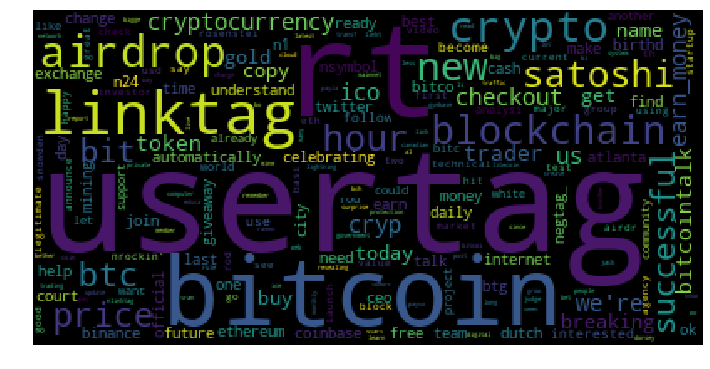

In [10]:
text = df['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Une première remarque : on voit linktag est très bien présentée, du coup peut être qu'il n'était pas judicieux d'uniformiser les liens puisqu'ils n'ont peut être pas la même valeur

**RNN algorithm setup**

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.layers import LSTM, LeakyReLU
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import h5py
import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Using TensorFlow backend.


**RNN without pretraining**

In [12]:
for i in range(df.shape[0]):
    if(df["class"][i]=="['positive']"):
        df["class"][i]=1
    if(df["class"][i]=="['negative']"):
        df["class"][i]=0

In [13]:
df = df.dropna(subset=['class'])

In [14]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)
X, y = (df["clean_tweet"].values, df["class"].values)

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')

In [ ]:
X_pad.shape,df.shape,y.shape

In [16]:
X_n = X_pad[df['class']==0]
X_p = X_pad[df['class']==1]
y_p = y[df['class']==1]
y_n = y[df['class']==0]

In [ ]:
X_p.shape,y_p.shape,X_n.shape,y_n.shape

In [17]:
# Split Train Test sets, en essayant d'avoir des proportions équilibrées de "positive" & "negative"
import sklearn
from sklearn.model_selection import train_test_split
X_p_train, X_p_test,y_p_train,y_p_test = train_test_split(X_p,y_p, test_size=0.3, random_state=seed)

X_n_train, X_n_test,y_n_train,y_n_test = train_test_split(X_n,y_n, test_size=0.3, random_state=seed)

X_p_train=pd.DataFrame(X_p_train)
X_n_train=pd.DataFrame(X_n_train)
X_train=X_p_train.append(X_n_train)  

y_p_train=pd.DataFrame(y_p_train)
y_n_train=pd.DataFrame(y_n_train)
y_train=y_n_train.append(y_p_train)

X_p_test=pd.DataFrame(X_p_test)
X_n_test=pd.DataFrame(X_n_test)
X_test=X_p_test.append(X_n_test)

y_p_test=pd.DataFrame(y_p_test)
y_n_test=pd.DataFrame(y_n_test)
y_test=y_p_test.append(y_n_test)

In [18]:
batch_size = 128
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

> LSTM

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
max_words = 100
embedding_size = 100
model = Sequential()
model.add(Embedding(20000, embedding_size, input_length=max_words))
model.add(LSTM(64))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model_history = model.fit(X_train1, y_train1, validation_data=(X_valid, y_valid),epochs=50, batch_size=batch_size, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 20115 samples, validate on 128 samples
Epoch 1/50
 - 22s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 5/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 6/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 7/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 8/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 9/50
 - 21s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 10/50
 - 20s - loss: 12.8648 - acc: 0.2018 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 11/50
 

In [ ]:
scores=model.evaluate(X_test,y_test,verbose=0)

In [ ]:
print(scores[1]) 

> GRU

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout

max_words = 100
embedding_size = 32
model = Sequential()
model.add(Embedding(20000, embedding_size, input_length=max_words))
model.add(keras.layers.GRU(128))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model_history = model.fit(X_train1, y_train1, validation_data=(X_valid, y_valid),epochs=50, batch_size=batch_size, verbose=2)

In [ ]:
scores=model.evaluate(X_test,y_test,verbose=0)
print(scores[1]) 

In [ ]:
# je trouve aussi 0.7931312665667858 comme accuracy
# en variant le paramètre vocabulary_size on voit qu'il a une importance forte sur le score final

**RNN pretrained with Word2Vec Skip-gram**

> Skip gram

In [ ]:
from nltk.corpus import brown
from gensim.models import Word2Vec
import multiprocessing

In [ ]:
from gensim.models import KeyedVectors
#model_ug_cbow = KeyedVectors.load('w2v_model_ug_cbow.word2vec')
#model_ug_sg = KeyedVectors.load('w2v_model_ug_sg.word2vec')

In [ ]:
X,y=df["clean_tweet"],df["class"]

In [ ]:
X_n = X[df['class']==0]
X_p = X[df['class']==1]
y_p = y[df['class']==1]
y_n = y[df['class']==0]

In [ ]:
X_p_train, X_p_test,y_p_train,y_p_test = train_test_split(X_p,y_p, test_size=0.3, random_state=seed)

X_n_train, X_n_test,y_n_train,y_n_test = train_test_split(X_n,y_n, test_size=0.3, random_state=seed)

X_p_train=pd.DataFrame(X_p_train)
X_n_train=pd.DataFrame(X_n_train)
X_train=X_p_train.append(X_n_train)  

y_p_train=pd.DataFrame(y_p_train)
y_n_train=pd.DataFrame(y_n_train)
y_train=y_n_train.append(y_p_train)

X_p_test=pd.DataFrame(X_p_test)
X_n_test=pd.DataFrame(X_n_test)
X_test=X_p_test.append(X_n_test)

y_p_test=pd.DataFrame(y_p_test)
y_n_test=pd.DataFrame(y_n_test)
y_test=y_p_test.append(y_n_test)


batch_size = 128
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

def labelize_tweets_bg(tweets,label=y):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

all_x = pd.concat([X_train1,X_valid,X_test])
all_x_w2v_bg = labelize_tweets_bg(all_x, 'all')

cores = multiprocessing.cpu_count()

model_ug_sg = Word2Vec(sg=0, size=256, negative=5, window=10, min_count=2,
                         workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v_bg)])

In [ ]:
for epoch in range(25):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v_bg)]),
                      total_examples=len(all_x_w2v_bg), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

In [ ]:

def get_w2v_mean(tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += np.append(model_ug_sg[word]).reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec
  
def get_w2v_sum(tweet, size):
    vec = np.zeros(size).reshape((1, size))
    for word in tweet.split():
        try:
            vec += np.append(model_ug_sg[word]).reshape((1, size))
        except KeyError:
            continue
    return vec
  
train_vecs_sg_mean = scale(np.concatenate([get_w2v_mean(z, 200) for z in X_train]))
validation_vecs_sg_mean = scale(np.concatenate([get_w2v_mean(z, 200) for z in X_valid]))

> LSTM

In [ ]:
clf = LogisticRegression()
clf.fit(train_vecs_cbowsg_mean, y_train)
print clf.score(validation_vecs_cbowsg_mean, y_validation)

train_vecs_cbowsg_sum = scale(np.concatenate([get_w2v_sum(z, 200) for z in x_train]))
validation_vecs_cbowsg_sum = scale(np.concatenate([get_w2v_sum(z, 200) for z in x_validation]))
clf = LogisticRegression()
clf.fit(train_vecs_cbowsg_sum, y_train)
print clf.score(validation_vecs_cbowsg_sum, y_validation)

model = Sequential()
model.add(Embedding(20000, embedding_size, input_length=max_words))
model.add(LSTM(64))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model_history = model.fit(train_vecs_cbowsg_sum, y_train,epochs=50, batch_size=batch_size, verbose=2)

In [ ]:
scores=model.evaluate(validation_vecs_cbowsg_sum, y_validation,verbose=0)
print(scores[1]) 

> GRU

In [ ]:
model = Sequential()
model.add(Embedding(20000, embedding_size, input_length=max_words))
model.add(keras.layers.GRU(128))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model_history = model.fit(X_train1, y_train1, validation_data=(X_valid, y_valid),epochs=epochs, batch_size=batch_size, verbose=2)

In [ ]:
scores=model.evaluate(validation_vecs_cbowsg_sum, y_validation,verbose=0)
print(scores[1]) 

Malheureseument à cause du temps on n'a pas pu generer les rendements pour sentiments
Ni les types de régressions prédictives pour les séries temporelles de retour de journal d’index de crypto-monnaie (la moyenne autorégressive et la variance).